In [1]:
import re
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# 读取 CSV 文件，并获取 content 列的数据前十行
poems = []
with open('data.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)

    for index, row in enumerate(csv_reader):
        poem_content = row['content']
        poems.append(poem_content)
    
# 输出结果
for poem in poems:
    print(poem)


平林漠漠烟如织，寒山一带伤心碧。暝色入高楼，有人楼上愁。玉阶空伫立，宿鸟归飞急。何处是归程？长亭更短亭。


箫声咽，秦娥梦断秦楼月。秦楼月，年年柳色，灞陵伤别。乐游原上清秋节，咸阳古道音尘绝。音尘绝，西风残照，汉家陵阙。


秋风清，秋月明，落叶聚还散，寒鸦栖复惊。相思相见知何日？此时此夜难为情！入我相思门，知我相思苦，长相思兮长相忆，短相思兮无穷极，早知如此绊人心，何如当初莫相识。


西塞山前白鹭飞，桃花流水鳜鱼肥。青箬笠，绿蓑衣，斜风细雨不须归。


边草，边草，边草尽来兵老。山南山北雪晴， 千里万里月明。明月，明月，胡笳一声愁绝。


团扇，团扇，美人病来遮面。玉颜憔悴三年，谁复商量管弦。弦管，弦管，春草昭阳路断。


山桃红花满上头，蜀江春水拍山流。花红易衰似郎意，水流无限似侬愁。


斑竹枝，斑竹枝，泪痕点点寄相思。楚客欲听瑶瑟怨，潇湘深夜月明时。


江南好，风景旧曾谙。日出江花红胜火，春来江水绿如蓝。能不忆江南？

江南好，风景旧曾谙。日出江花红胜火，春来江水绿如蓝。能不忆江南？江南忆，最忆是杭州。山寺月中寻桂子，郡亭枕上看潮头。何日更重游？江南忆，其次忆吴宫。吴酒一杯春竹叶，吴娃双舞醉芙蓉。早晚复相逢？

汴水流，泗水流，流到瓜州古渡头。吴山点点愁。思悠悠，恨悠悠，恨到归时方始休。月明人倚楼。


花非花，雾非雾。夜半来，天明去。来如春梦几多时？去似朝云无觅处。


借问江潮与海水，何似君情与妾心？相恨不如潮有信，相思始觉海非深。


菡萏香连十顷陂，小姑贪戏采莲迟。晚来弄水船头湿，更脱红裙裹鸭儿。


兰烬落，屏上暗红蕉。闲梦江南梅熟日，夜船吹笛雨萧萧。人语驿边桥。


梳洗罢，独倚望江楼。过尽千帆皆不是，斜晖脉脉水悠悠。肠断白蘋洲。


小山重叠金明灭，鬓云欲度香腮雪。懒起画蛾眉，弄妆梳洗迟。照花前后镜，花面交相映。新帖绣罗襦，双双金鹧鸪。


柳丝长，春雨细，花外漏声迢递。惊塞雁，起城乌，画屏金鹧鸪。香雾薄，透帘幕，惆怅谢家池阁。红烛背，绣帘垂，梦长君不知。


红楼别夜堪惆怅，香灯半卷流苏帐。残月出门时，美人和泪辞。琵琶金翠羽，弦上黄莺语。劝我早还家，绿窗人似花。


人人尽说江南好，游人只合江南老。春水碧于天，画船听雨眠。垆边人似月，皓腕凝霜雪。未老莫还乡，还乡须断肠。


劝君今夜须沉醉，尊前莫话明朝事。珍重主人心，酒深情亦深。须愁

In [3]:
# 去除标点的数据准备
cleaned_poems = [re.sub(r'[^\w\s]', '', poem) for poem in poems]
cleaned_poems = [re.sub(r'[\s\n]', '', poem) for poem in cleaned_poems]
# 构建词汇表
vocab = set("".join(cleaned_poems))
vocab_size = len(vocab)
char_to_index = {char: i for i, char in enumerate(vocab)}
index_to_char = {i: char for i, char in enumerate(vocab)}


In [4]:
print(vocab)
print(vocab_size)
print(char_to_index)
print(index_to_char)

{'棹', '溅', '肆', '徉', '整', '理', '收', '瓜', '逾', '线', '湖', '帕', '知', '窗', '协', '销', '乘', '觑', '鼙', '岸', '遂', '偎', '携', '肠', '歌', '匹', '龟', '封', '限', '喧', '护', '止', '即', '旌', '宿', '凤', '娑', '郭', '八', '当', '置', '天', '昏', '嫦', '秋', '日', '渭', '阕', '藕', '鞚', '毡', '柔', '芝', '返', '贱', '梁', '露', '尼', '蓦', '枣', '此', '阔', '田', '圞', '力', '芙', '冶', '浮', '烈', '拚', '题', '爱', '样', '邻', '野', '霁', '丈', '堕', '今', '蝠', '嚬', '宽', '为', '英', '肝', '堠', '诚', '始', '底', '鸣', '输', '双', '拈', '肺', '块', '着', '沟', '鹿', '蝙', '河', '居', '穿', '儿', '准', '舟', '手', '猊', '舷', '多', '藁', '蝉', '召', '探', '么', '鶗', '戎', '囊', '首', '蟾', '豆', '绣', '正', '残', '冈', '湾', '土', '瑶', '电', '靓', '杜', '恁', '弁', '阶', '平', '禹', '鸦', '丙', '蛙', '旅', '曲', '眠', '匠', '见', '嬉', '洛', '沈', '每', '侧', '砧', '商', '箫', '盼', '骚', '化', '沧', '讯', '岑', '碎', '梢', '内', '彦', '谢', '扬', '危', '润', '暴', '寂', '勺', '鳞', '悴', '液', '扫', '唇', '空', '访', '来', '陂', '悔', '慨', '圃', '看', '沽', '形', '眉', '奴', '帐', '曳', '难', '厮', '弄', '匈', '禅', '约', '怕', '鸾', '沙', '雳', '竟', '经', '要',

In [5]:
# 将诗歌转换为数字序列
def poem_to_indices(poem):
    return [char_to_index[char] for char in poem]

In [6]:
# 构建输入输出数据
X = []
y = []
for poem in cleaned_poems:
    indices = poem_to_indices(poem)
    print(indices)
    for i in range(len(indices) - 1):
        # if(i==0):continue
        X.append(indices[i])
        y.append(indices[i + 1])

# 将数据转换为numpy数组
X = np.array(X)
y = np.array(y)


[133, 1716, 1088, 1088, 611, 541, 2061, 1369, 841, 907, 396, 236, 2037, 1462, 1909, 283, 908, 220, 528, 670, 2001, 528, 1008, 972, 1666, 132, 173, 1378, 675, 34, 438, 1979, 794, 1161, 1864, 282, 905, 1979, 487, 1138, 807, 1261, 1638, 807]
[150, 1135, 1403, 625, 1242, 1146, 988, 625, 528, 986, 625, 528, 986, 266, 266, 1755, 283, 1070, 1830, 236, 1562, 1929, 309, 1588, 1008, 430, 44, 1120, 1742, 1789, 1489, 876, 475, 1633, 1550, 475, 1633, 1550, 667, 658, 122, 1658, 2052, 962, 1830, 1869]
[44, 658, 430, 44, 986, 1449, 1283, 784, 395, 1377, 1314, 1369, 135, 476, 1465, 1213, 405, 200, 405, 142, 12, 1864, 45, 60, 1500, 60, 288, 187, 82, 1331, 908, 737, 405, 200, 2087, 12, 737, 405, 200, 340, 1138, 405, 200, 1826, 1138, 405, 1098, 1638, 405, 200, 1826, 251, 1252, 1053, 1418, 12, 541, 60, 443, 2001, 2037, 1864, 541, 39, 1249, 231, 405, 1054]
[667, 1123, 841, 1722, 1595, 629, 794, 1131, 451, 514, 774, 623, 1681, 576, 1022, 1125, 1440, 2056, 516, 970, 1707, 658, 488, 1221, 1628, 1482, 1979]
[24

In [84]:
index_to_char[1957]

'城'

In [85]:
index_to_char[1602]

'支'

In [91]:
X

array([ 336, 1253, 1303, ..., 2056,  705,  519])

In [92]:
y

array([1253, 1303, 1303, ...,  705,  519, 1250])

In [7]:
vocab_size

2096

In [8]:
# 定义RNN参数
input_size = vocab_size
hidden_size = 50
output_size = vocab_size
learning_rate = 0.01

In [9]:
# 参数初始化
hidden_size = 100  # 增加隐藏层大小
seq_length = 20  # 每批训练的序列长度
learning_rate = 0.01

In [10]:
# 初始化权重
Wxh = np.random.randn(hidden_size, input_size) * 0.01
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
Why = np.random.randn(output_size, hidden_size) * 0.01
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

In [11]:
Wxh

array([[-2.71098367e-02,  2.32825610e-03,  7.54611580e-03, ...,
        -6.34017364e-03,  2.66243057e-03, -3.79999768e-03],
       [-4.77723392e-03,  8.12703459e-04, -9.87385633e-03, ...,
        -1.28090787e-03,  8.35822737e-03, -3.60176043e-03],
       [ 1.85723797e-02, -1.00586018e-04, -1.51592769e-02, ...,
        -1.67334469e-02,  5.30567443e-03,  9.42519134e-03],
       ...,
       [ 6.58558976e-03, -6.33413363e-03,  9.34192519e-03, ...,
        -8.27246709e-03,  5.76234408e-05, -2.37760991e-03],
       [ 7.86549392e-03,  1.13095842e-02,  1.76025079e-03, ...,
        -8.30786848e-03, -1.05261425e-02,  5.31313593e-03],
       [-7.37807084e-03, -1.44721786e-02, -2.56106309e-03, ...,
        -7.00697739e-03, -3.18077239e-03,  5.58693567e-03]])

In [12]:
bh

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [13]:
# 前向传播和反向传播函数定义
def forward_backward(inputs, targets, hprev):
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0

    # 前向传播
    for t in range(len(inputs)):
        xs[t] = np.zeros((input_size, 1))
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh)
        ys[t] = np.dot(Why, hs[t]) + by
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))
        loss += -np.log(ps[t][targets[t], 0])

    # 反向传播
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])

    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext
        dhraw = (1 - hs[t] * hs[t]) * dh
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)

    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

In [14]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [15]:
# 调整后的训练函数
def train(data, iter_num):
    n, p = 0, 0
    hprev = np.zeros((hidden_size, 1))

    for i in range(iter_num):
        hprev = np.zeros((hidden_size, 1))  # 重置隐藏状态

        for line in data:
            if len(line) < 2:  # 跳过空行或单字符行
                continue

            inputs = [char_to_index[line[0]]]  # 使用首个字符作为输入
            targets = [char_to_index[char] for char in line[1:]]  # 目标是整行诗的剩余部分

            loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)

            for param, dparam in zip([Wxh, Whh, Why, bh, by], [dWxh, dWhh, dWhy, dbh, dby]):
                param += -learning_rate * dparam

            if n % 100 == 0:
                print(f"Epoch {n}, Loss: {loss}")
            n += 1

In [101]:
# 训练模型
def train(data, iter_num):
    losses = []
    num_losses = []
    n, p = 0, 0
    hprev = np.zeros((hidden_size, 1))
    smooth_loss = -np.log(1.0/vocab_size)*seq_length

    for i in range(iter_num):
        # 准备输入和输出数据
        if p+seq_length+1 >= len(data) or n == 0: 
            hprev = np.zeros((hidden_size, 1))
            p = 0
        inputs = [char_to_index[ch] for ch in data[p:p+seq_length]]
        targets = [char_to_index[ch] for ch in data[p+1:p+seq_length+1]]
        # 前向传播和反向传播
        loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)
        # 参数更新
        for param, dparam in zip([Wxh, Whh, Why, bh, by],
                                [dWxh, dWhh, dWhy, dbh, dby]):
            param += -learning_rate * dparam

        p += seq_length
        n += 1

        if n % 100 == 0:
            print(f"Epoch {n}, Loss: {loss}")
            losses.append(loss)
        
        num_loss = {loss:i}
        num_losses.append(num_loss)
        
    if(i==iter_num-1):
        # 创建一个折线图
        # plt.plot(losses)
        plt.scatter(range(len(losses)), losses, color='red', marker='o')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
        num = min(losses)
        for i in num_losses:
            if num in i:
                print(i[num])
        print(num)

In [16]:
data = ''.join(cleaned_poems)
train(data, iter_num=3000)

Epoch 100, Loss: 152.36746152327524
Epoch 200, Loss: 149.59685468980274
Epoch 300, Loss: 137.27369153610508
Epoch 400, Loss: 151.13902354669307
Epoch 500, Loss: 136.0941144380244
Epoch 600, Loss: 137.34478785547284
Epoch 700, Loss: 130.23799479381336
Epoch 800, Loss: 134.1127885063286
Epoch 900, Loss: 133.53404119084976
Epoch 1000, Loss: 132.00237569634223


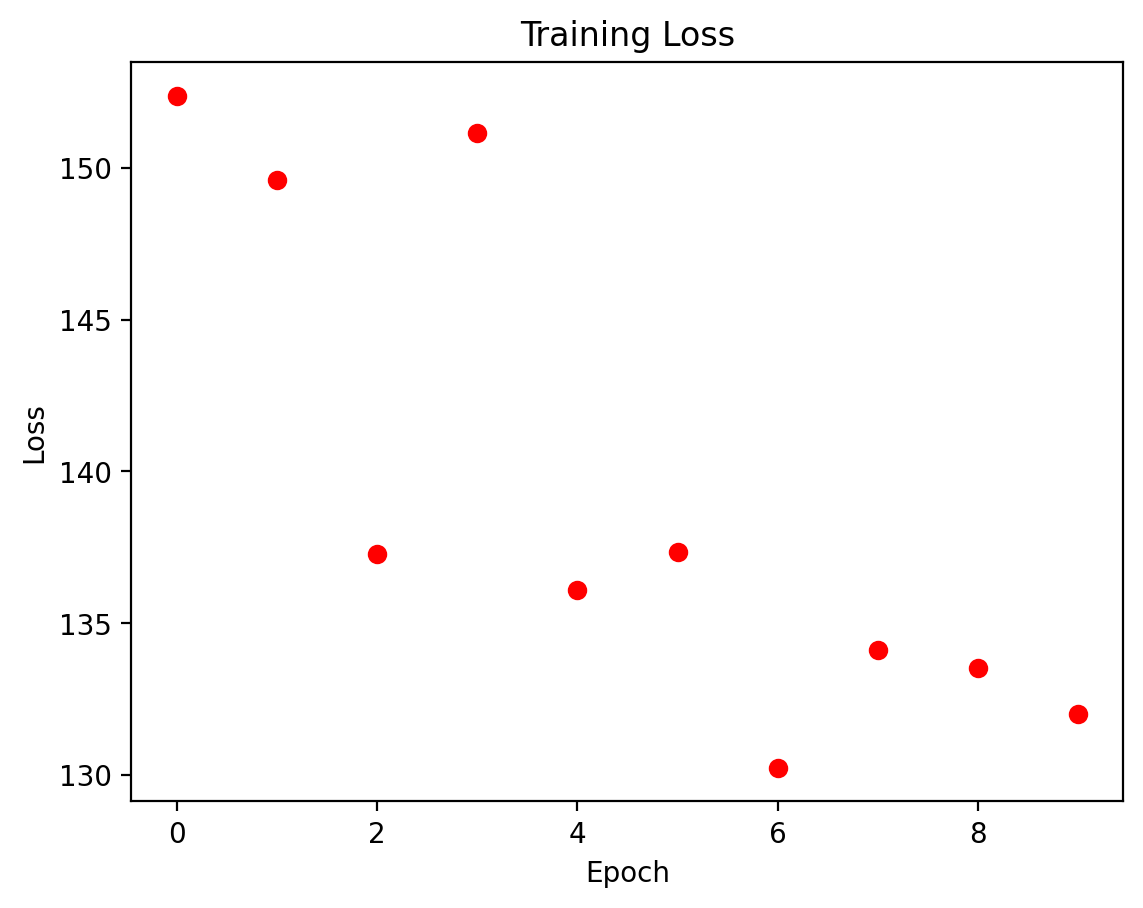

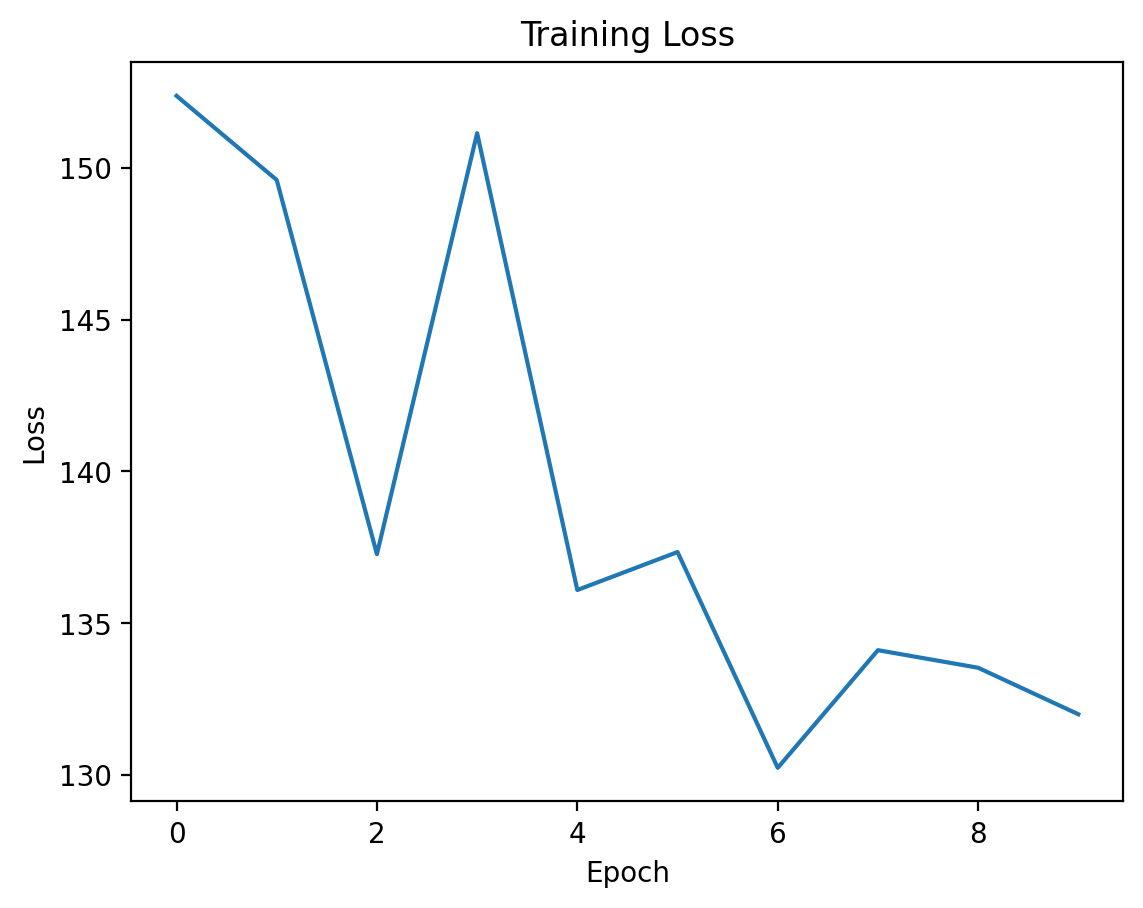

699
130.23799479381336


In [102]:
data = ''.join(cleaned_poems)
train(data, iter_num=1000)

In [103]:
def generate_line(start_char, length=5):
    # 如果起始字符不在词汇表中，使用一个随机字符进行后续生成
    if start_char not in char_to_index:
        random_char = np.random.choice(list(vocab))
        start_index = char_to_index[random_char]
    else:
        start_index = char_to_index[start_char]

    x = np.zeros((input_size, 1))
    x[start_index] = 1
    h = np.zeros((hidden_size, 1))
    indices = [start_index]  # 使用选择或随机字符的索引开始

    for _ in range(length - 1):  # 减去 1 因为起始字符已经确定
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y_hat = np.dot(Why, h) + by
        prob = np.exp(y_hat) / np.sum(np.exp(y_hat))
        next_char = np.random.choice(range(vocab_size), p=prob.ravel())
        indices.append(next_char)
        x = np.zeros((input_size, 1))
        x[next_char] = 1

    # 将生成的诗句的第一个字符替换为原始的起始字符
    generated_poem = "".join(index_to_char[i] for i in indices)
    return start_char + generated_poem[1:]

input_chars = input("请输入藏头诗的头，以空格分隔: ").split(' ')

for char in input_chars:
    generated_line = generate_line(char, length=5)
    print(generated_line)


新学聊媒一
春固昨结向
快付舴处子
乐处鹧过白


In [105]:
import numpy as np
import pickle

np.save('Wxh.npy', Wxh)
np.save('Whh.npy', Whh)
np.save('Why.npy', Why)
np.save('bh.npy', bh)
np.save('by.npy', by)

with open('char_to_index.pickle', 'wb') as handle:
    pickle.dump(char_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_char.pickle', 'wb') as handle:
    pickle.dump(index_to_char, handle, protocol=pickle.HIGHEST_PROTOCOL)
